In [3]:
#使用するクラスのimport
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#使用するフォルダ・ファイルの確認
import os
for dirname, _,filenames in os.walk("titanic"):
    for filename in filenames:
        print(os.path.join(dirname,filename))

titanic/test.csv
titanic/my_submission.csv
titanic/train.csv
titanic/gender_submission.csv


In [5]:
os.walk("titanic")

<generator object walk at 0x7fec0e78be40>

In [6]:
#os.walkの返り値を確認("current directory",["directories"],["files"])
i = []
for j in os.walk("titanic"):
    i.append(j)
    print(i)

[('titanic', [], ['test.csv', 'my_submission.csv', 'train.csv', 'gender_submission.csv'])]


In [7]:
#訓練データ、テストデータをそれぞれ読み込む。
train_df = pd.read_csv("titanic/train.csv")
test_df = pd.read_csv("titanic/test.csv")

In [8]:
#データクレンジング
#初めに、データ内部の数値やカテゴリ値を確認し、一意的なindexを削除していく。
#中身の確認戦闘の5行
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [10]:
#PassengerId、Ticketは一意性を持つので削除する。
train_df = train_df.drop(["PassengerId","Ticket"],axis = 1)
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


In [11]:
#テストデータでも同様に削除する。
test_df = test_df.drop(["PassengerId","Ticket"],axis = 1)
test_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,NaN,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,NaN,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,NaN,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,NaN,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,NaN,S


In [12]:
#欠損値、dtypeの確認
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [13]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Fare      417 non-null    float64
 7   Cabin     91 non-null     object 
 8   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(4)
memory usage: 29.5+ KB


In [14]:
#ともにCabinの欠損値が多く、学習に偏りが出るため削除。
train_df  = train_df.drop("Cabin",axis = 1)
test_df = test_df.drop("Cabin",axis = 1)

In [15]:
#カテゴリ値であるPclass,Sex,Embarked、離散的なデータであるSibsp,Parchと"Survived"との相関を確認するためにピボットテーブルを作成
correlation = ["Pclass","Sex","SibSp","Parch","Embarked"]
for i in correlation:
    print("Correlation between Survived and " + i)
    print(train_df[[i,"Survived"]].groupby(i,as_index = False).mean().sort_values("Survived",ascending = False))
    print()

Correlation between Survived and Pclass
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363

Correlation between Survived and Sex
      Sex  Survived
0  female  0.742038
1    male  0.188908

Correlation between Survived and SibSp
   SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000

Correlation between Survived and Parch
   Parch  Survived
3      3  0.600000
1      1  0.550847
2      2  0.500000
0      0  0.343658
5      5  0.200000
4      4  0.000000
6      6  0.000000

Correlation between Survived and Embarked
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957



In [16]:
#PclassやSexで高い相関が得られた。この２つを用いて、他のindexを特徴量として採用するか検討する。
#別のcolumnsとの関係を見ていく。
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

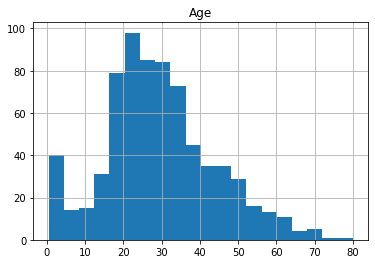

In [17]:
#AgeやFareなどの連続的なデータとSurvivedの関係を見ていく。
#Ageの分布を確認
train_df[["Age"]].hist(bins = 20)

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

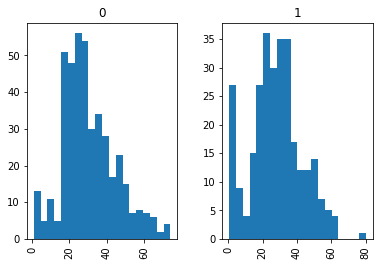

In [18]:
#Survivedが0の時、1の時のAgeの確認
train_df[["Age"]].hist(by = train_df["Survived"],bins = 20)

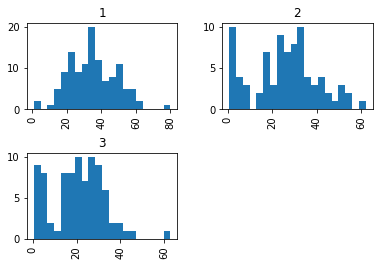

In [19]:
#0~4歳の生存者が多い。最高齢層の生存者がいる。若い方(16~20歳)の死者が多い。ほとんどの乗客は16~36歳である。
#Pclassが[1,2,3]でSurvivedが0の時、1の時の分布を見る。
train_df[train_df["Survived"] ==1]["Age"].hist(by = train_df["Pclass"],bins = 20)
plt.show()

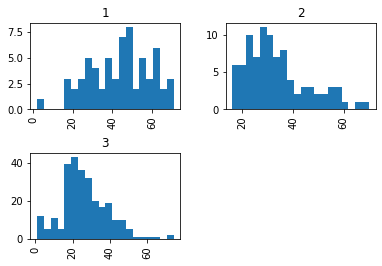

In [20]:
#Pclassが1の時生存率が高い。Pclassが2及び3の時の0~4際の生存率が高い。
#Pclassは乗客の年齢に応じて分布が変わる。
#Pclassを特徴量として決定。
train_df[train_df["Survived"] == 0]["Age"].hist(by = train_df["Pclass"],bins = 20)
plt.show()

In [21]:
#Pclassが3の時、16~40際の乗客の死亡率が高い。Pclassが2の時0~16際の生存率が高い。
#PclassとSurvivedのピポットテーブルから得られる仮説を満たしている。

<AxesSubplot:>

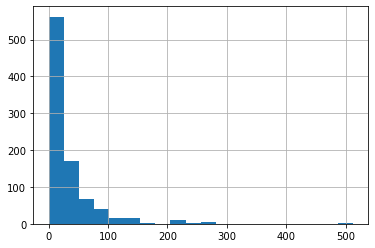

In [22]:
#次にFareの分布を確認。　--------> Pclassを特徴量として扱うことを決定したので一応保留
train_df["Fare"].hist(bins = 20)

In [23]:
#Enbarkedのピポットテーブルでは高い相関が得られなかったため、他の値を用いてSurvivedとの相関を見ていく。
#Embarkedを固定した時、Pclass,Survived,Sexとの相関を確認する。
correlation = ["C","Q","S"]
for i in  correlation:
    cor_category = train_df[train_df["Embarked"] == i][["Survived","Pclass","Sex"]].groupby(["Pclass","Sex"],as_index = False).mean().sort_values(by = "Survived", ascending = False)
    print("when Embarked == 「" + i + "」 Correlation between Survived and [Pclass,Sex]")
    print(cor_category)

when Embarked == 「C」 Correlation between Survived and [Pclass,Sex]
   Pclass     Sex  Survived
2       2  female  1.000000
0       1  female  0.976744
4       3  female  0.652174
1       1    male  0.404762
5       3    male  0.232558
3       2    male  0.200000
when Embarked == 「Q」 Correlation between Survived and [Pclass,Sex]
   Pclass     Sex  Survived
0       1  female  1.000000
2       2  female  1.000000
4       3  female  0.727273
5       3    male  0.076923
1       1    male  0.000000
3       2    male  0.000000
when Embarked == 「S」 Correlation between Survived and [Pclass,Sex]
   Pclass     Sex  Survived
0       1  female  0.958333
2       2  female  0.910448
4       3  female  0.375000
1       1    male  0.354430
3       2    male  0.154639
5       3    male  0.128302


when Embarked == 「C」 Correlation between Survived and [Pclass,Sex]
   Pclass     Sex  Survived
2       2  female  1.000000
0       1  female  0.976744
4       3  female  0.652174
1       1    male  0.404762
5       3    male  0.232558
3       2    male  0.200000


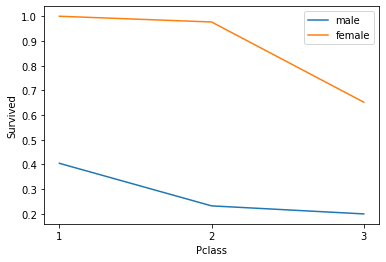

when Embarked == 「Q」 Correlation between Survived and [Pclass,Sex]
   Pclass     Sex  Survived
0       1  female  1.000000
2       2  female  1.000000
4       3  female  0.727273
5       3    male  0.076923
1       1    male  0.000000
3       2    male  0.000000


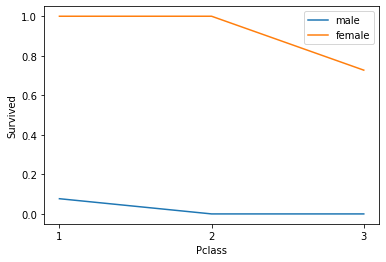

when Embarked == 「S」 Correlation between Survived and [Pclass,Sex]
   Pclass     Sex  Survived
0       1  female  0.958333
2       2  female  0.910448
4       3  female  0.375000
1       1    male  0.354430
3       2    male  0.154639
5       3    male  0.128302


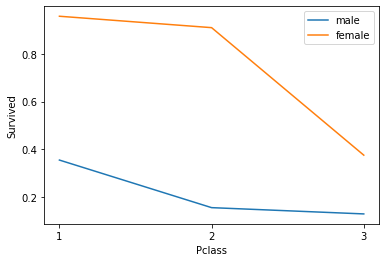

In [24]:
#上記のピポットテーブルを可視化
correlation = ["C","Q","S"]
for i in  correlation:
    cor_category = train_df[train_df["Embarked"] == i][["Survived","Pclass","Sex"]].groupby(["Pclass","Sex"],as_index = False).mean().sort_values(by = "Survived", ascending = False)
    print("when Embarked == 「" + i + "」 Correlation between Survived and [Pclass,Sex]")
    print(cor_category)
    cor_category_male = cor_category[cor_category["Sex"] == "male"]
    cor_category_female = cor_category[cor_category["Sex"] == "female"]
    plt.plot(["1","2","3"],cor_category_male["Survived"],label = "male")
    plt.plot(["1","2","3"],cor_category_female["Survived"],label ="female")
    plt.legend()
    plt.xlabel("Pclass")
    plt.ylabel("Survived")
    plt.show()

In [25]:
#EmbarkedがQかつPclassが1の男性の生存率が高い。Pclassが1,2の時の女性の生存率が全体的に高い。
#これはPclassとEmbarkedが相関関係にあり、Pclass,SexがSurvivedと相関関係にあることを表している。
#EmbarkedとSexを特徴量に加える。

when Embarked == 「C」correlation between Survived and Fare
   Survived     Sex       Fare
0         0  female  16.215278
1         0    male  38.065342
2         1  female  83.460286
3         1    male  71.468545


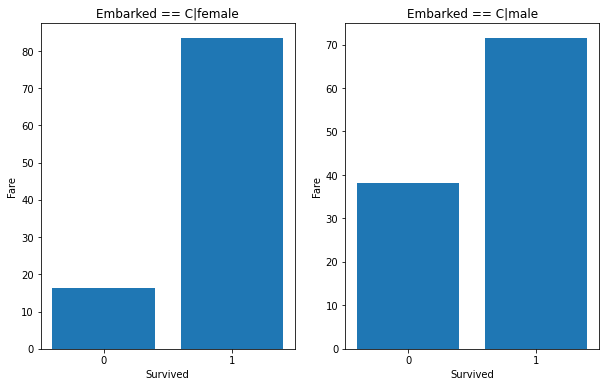

when Embarked == 「Q」correlation between Survived and Fare
   Survived     Sex       Fare
0         0  female  10.904633
1         0    male  13.911732
2         1  female  13.211733
3         1    male  12.916667


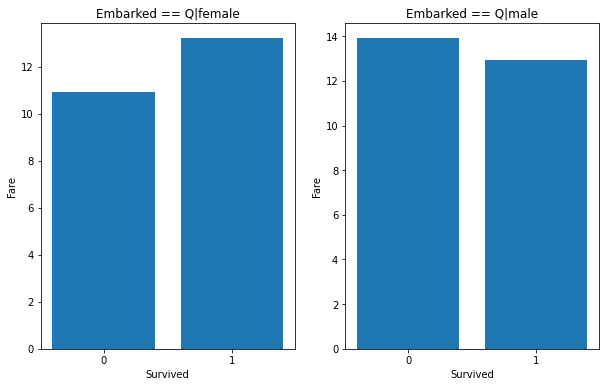

when Embarked == 「S」correlation between Survived and Fare
   Survived     Sex       Fare
0         0  female  25.728508
1         0    male  19.881281
2         1  female  44.596518
3         1    male  30.366286


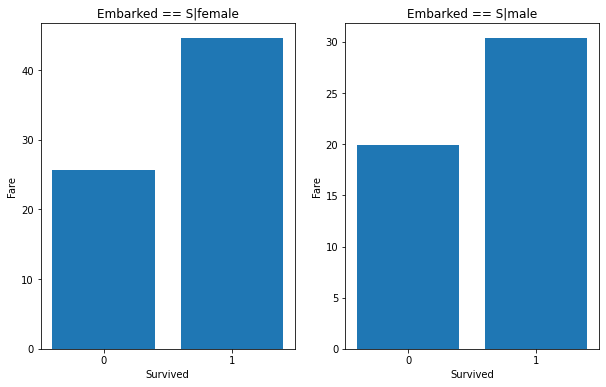

In [26]:
#同様にFareと他の特徴量に相関があるかどうかを見ていく。
#生存者と死亡者の料金を比較していく。
for j in correlation:
    print("when Embarked == 「" + j + "」correlation between Survived and Fare")
    charge = train_df[train_df["Embarked"] == j][["Fare","Survived","Sex"]].groupby(["Survived","Sex"],as_index = False).mean()
    print(charge)
    charge_female = charge[charge["Sex"] == "female"]
    charge_male = charge[charge["Sex"] == "male"]
    fig,(axL,axR) = plt.subplots(ncols = 2,figsize =(10,6))
    axL.bar(["0","1"],charge_female["Fare"])
    axR.bar(["0","1"],charge_male["Fare"])
    axL.set_title("Embarked == " + j + "|female")
    axR.set_title("Embarked == " + j + "|male")
    axL.set_xlabel("Survived")
    axL.set_ylabel("Fare")
    axR.set_xlabel("Survived")
    axR.set_ylabel("Fare")
    plt.show()

In [27]:
#Embarkedが変わるとFareとSurvivedの棒グラフが変化する。
#Embarked == C,Sの時、男女どちらも高い料金を支払っている乗客は生存率が高い傾向にある。
#Embarked == Qでは、特に特徴は見られなかった。
#FareはSurvivedと相関はあるが他のカテゴリ値とは相関が見られなかった。
#Fareは特徴量としないものとする。

In [28]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [29]:
test_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S


In [30]:
#データの補完を行っていく。
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [31]:
#一意性の高いNameを敬称ごとに分けて、新しい"Title"という列indexに加える。
combine = [train_df,test_df]
firstloop = True
for k in combine:
    k["Title"] = k.Name.str.extract(("([A-Za-z]+)\."),expand = False)
    if firstloop:
        train_df = k
        firstloop = False
    else:
        test_df = k
        
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr


In [32]:
test_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,Mr
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,Mrs
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,Mr
3,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,Mr
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,Mrs


In [33]:
#"Title"カテゴリ値を集計するためにクロス集計を用いる。
pd.crosstab(train_df["Title"],train_df["Sex"])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [34]:
#敬称をまとめ、データの簡略化を行う。
#'Lady', 'Countess','Capt', 'Col',　'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'の項目は'Rare'に書き換える。
#"Mile","Ms"は"Miss"に書き換え
#"Mme"は"Mrs"に書き換える。
#結果的に"Sex"と"Name"を合わせて、新しい特徴量"Title"を作成する。
combine = [train_df,test_df]
firstloop = True
for l in combine:
    l["Title"] = l["Title"].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'],'Rare')
    l["Title"] = l["Title"].replace(["Mlle","Ms"],"Miss")
    l["Title"] = l["Title"].replace("Mme","Mrs")
    if firstloop:
        train_df = l
        firstloop = False   
    else:
        test_df = l
pd.crosstab(train_df["Title"],train_df["Sex"])

Sex,female,male
Title,,
Master,0,40
Miss,185,0
Mr,0,517
Mrs,126,0
Rare,3,20


In [35]:
#Titleは特徴量として成り立つのか調べるため、Survivedと相関を調べる。
train_df[["Survived","Title"]].groupby("Title",as_index = False).mean().sort_values(by = "Survived",ascending = False)

,Title,Survived
3,Mrs,0.793651
1,Miss,0.702703
0,Master,0.575000
4,Rare,0.347826
2,Mr,0.156673


In [36]:
#"Title"のtrain_dfとtest_dfで、{"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare:5}に変換
#同様に"Sex"で{male:1,female:2}とする。
combine = [train_df,test_df]
firstloop = True
for o in combine:
    o["Title"] = o["Title"].map({"Mr":1,"Miss":2,"Mrs":3,"Master":4,"Rare":5})
    o["Sex"] = o["Sex"].map({"male": 0,"female" : 1})
    if firstloop:
        train_df = o
        firstloop = False
    else:
        test_df = o
test_df

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,"Kelly, Mr. James",0,34.5,0,0,7.8292,Q,1
1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,7.0000,S,3
2,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,9.6875,Q,1
3,3,"Wirz, Mr. Albert",0,27.0,0,0,8.6625,S,1
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,12.2875,S,3
...,...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",0,NaN,0,0,8.0500,S,1
414,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,108.9000,C,5
415,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,7.2500,S,1
416,3,"Ware, Mr. Frederick",0,NaN,0,0,8.0500,S,1


In [37]:
#Nameがいらなくなったので列indexから削除する。
combine = [train_df,test_df]
firstloop = True
for p in combine:
    p = p.drop(["Name"],axis = 1)
    if firstloop:
        combine[0] = p
        firstloop = False
    else:
        combine[1] = p
combine[1]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,0,34.5,0,0,7.8292,Q,1
1,3,1,47.0,1,0,7.0000,S,3
2,2,0,62.0,0,0,9.6875,Q,1
3,3,0,27.0,0,0,8.6625,S,1
4,3,1,22.0,1,1,12.2875,S,3
...,...,...,...,...,...,...,...,...
413,3,0,NaN,0,0,8.0500,S,1
414,1,1,39.0,0,0,108.9000,C,5
415,3,0,38.5,0,0,7.2500,S,1
416,3,0,NaN,0,0,8.0500,S,1


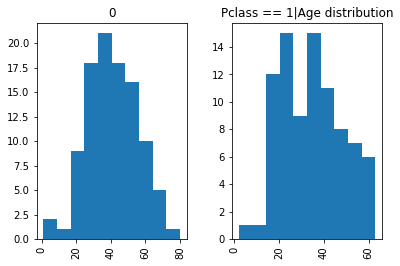

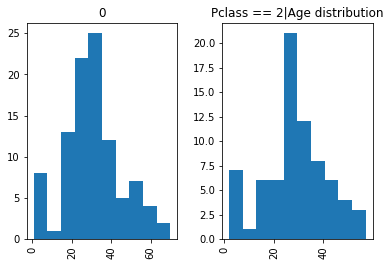

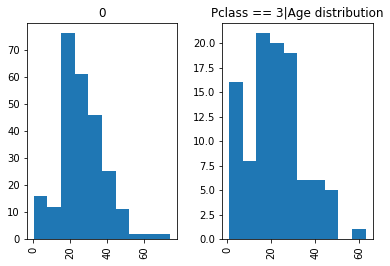

In [38]:
#Ageに欠損値が存在するのでその補完を行う。
#Pclass毎の年齢性別分布

pclass = [1,2,3]
for q in pclass:
    train_df[train_df["Pclass"] == q]["Age"].hist(by = train_df["Sex"])
    plt.title("Pclass == " + str(q) + "|Age distribution")
    plt.show()

In [39]:
#Ageのような連続的な数値を保管する方法
#1.平均との間に乱数を生成する方法
#2.欠損値を推測するより正確な方法は、相関のある他の特徴量を使用することです。これまでに、Age、Sex、Pclass間に相関があることが分かっています。つまり、PclassとGenderの組み合わせからAgeの値を推測します。例えば、Pclass=1、Gender=0、Pclass=1、Gender=1などの中間年齢などを使用します。
#3.1と2を組み合わせる方法です。そのため、中央値に基づいてAgeを推測する代わりに、PclassとGenderの組み合わせに基づいて平均と標準偏差の間の乱数を使用する。

In [40]:
#Ageの欠損値を埋める中央値を格納する配列を用意。
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [41]:
for dataset in combine:
    for i in range(0,2):
        for j in range(0,3):
            #firstloopで性別が男で、pclassが1であるAgeのSeriesをguess_dfに格納し、その中、欠損値のある要素を削除している。
            guess_df = dataset[(dataset["Sex"] == i) & (dataset["Pclass"] == j + 1)]["Age"].dropna()
            #firstloopで格納したAgeの中央値を計算
            age_guess = guess_df.median()
            print(age_guess)
            #中央値を0.5単位で丸める
            guess_ages[i,j] = int(age_guess/0.5 + 0.5)*0.5
            print(guess_ages)
    for i in range(0,2):
        for j in range(0,3):
            dataset.loc[(dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass ==j + 1),"Age"] = guess_ages[i,j]
    dataset["Age"] = dataset["Age"].astype(int)
train_df = combine[0]

40.0
[[40.  0.  0.]
 [ 0.  0.  0.]]
30.0
[[40. 30.  0.]
 [ 0.  0.  0.]]
25.0
[[40. 30. 25.]
 [ 0.  0.  0.]]
35.0
[[40. 30. 25.]
 [35.  0.  0.]]
28.0
[[40. 30. 25.]
 [35. 28.  0.]]
21.5
[[40.  30.  25. ]
 [35.  28.  21.5]]
42.0
[[42.  30.  25. ]
 [35.  28.  21.5]]
28.0
[[42.  28.  25. ]
 [35.  28.  21.5]]
24.0
[[42.  28.  24. ]
 [35.  28.  21.5]]
41.0
[[42.  28.  24. ]
 [41.  28.  21.5]]
24.0
[[42.  28.  24. ]
 [41.  24.  21.5]]
22.0
[[42. 28. 24.]
 [41. 24. 22.]]


In [42]:
test_df = combine[1]

In [43]:
#Ageを連続値から離散値に変更する。またその際、"Ageband"という新しいindexを作成する。
#Ageを５層に分ける。
train_df["Ageband"] = pd.cut(train_df["Age"],5)
train_df[["Ageband","Survived"]].groupby("Ageband",as_index = False).mean().sort_values(by = "Survived",ascending = True)

,Ageband,Survived
4,"(64.0, 80.0]",0.090909
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
0,"(-0.08, 16.0]",0.550000


In [44]:
#Agebandを離散的な値に変更する。
combine = [train_df,test_df]
for dataset in combine:
    dataset.loc[(dataset["Age"] <= 16 ),"Age"] = 0
    dataset.loc[(dataset["Age"] > 16) & (dataset["Age"] <= 32 ),"Age"] = 1
    dataset.loc[(dataset["Age"] > 32) & (dataset["Age"] <= 48 ),"Age"] = 2
    dataset.loc[(dataset["Age"] > 48) & (dataset["Age"] <= 64 ),"Age"] = 3
    dataset.loc[(dataset["Age"] > 64),"Age"]
combine[0]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Ageband
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,1,0,0,13.0000,S,5,"(16.0, 32.0]"
887,1,1,1,1,0,0,30.0000,S,2,"(16.0, 32.0]"
888,0,3,1,1,1,2,23.4500,S,2,"(16.0, 32.0]"
889,1,1,0,1,0,0,30.0000,C,1,"(16.0, 32.0]"


In [45]:
#Agebandを削除
train_df = train_df.drop(["Ageband"],axis = 1)

In [46]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


In [47]:
#SibspとParchを足し合わせて新しい要素"FimilySizeを作成する。
combine = [train_df,test_df]
for dataset in combine:
    dataset["FamilySize"] = dataset["SibSp"] + dataset["Parch"] + 1
train_df[["FamilySize","Survived"]].groupby("FamilySize",as_index = False).mean().sort_values("Survived",ascending = False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [48]:
#家族持ちか独身者で分ける新しい特徴量"isAlone"を新たに作成する。
for dataset in combine:
    dataset["isAlone"] = 0
    dataset.loc[(dataset["FamilySize"] == 1),"isAlone"] = 1
train_df[["isAlone","Survived"]].groupby("isAlone",as_index = False).mean()

,isAlone,Survived
0,0,0.505650
1,1,0.303538


In [49]:
#SibSp,Parch,FamilySizeを不要とし、削除
train_df = train_df.drop(["Parch","SibSp","FamilySize"],axis = 1)
test_df = test_df.drop(["Parch","SibSp","FamilySize"],axis = 1)
combine = [train_df,test_df]

In [50]:
train_df

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,isAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1
...,...,...,...,...,...,...,...,...
886,0,2,0,1,13.0000,S,5,1
887,1,1,1,1,30.0000,S,2,1
888,0,3,1,1,23.4500,S,2,0
889,1,1,0,1,30.0000,C,1,1


In [51]:
test_df

,Pclass,Sex,Age,Fare,Embarked,Title,isAlone
0,3,0,2,7.8292,Q,1,1
1,3,1,2,7.0000,S,3,0
2,2,0,3,9.6875,Q,1,1
3,3,0,1,8.6625,S,1,1
4,3,1,1,12.2875,S,3,0
...,...,...,...,...,...,...,...
413,3,0,1,8.0500,S,1,1
414,1,1,2,108.9000,C,5,1
415,3,0,2,7.2500,S,1,1
416,3,0,1,8.0500,S,1,1


In [52]:
#Ageclassという特徴量を新たに加える。AgeとPclassをかけ合わせたindex
for dataset in combine:
    dataset["Age*Class"] = dataset["Age"]*dataset["Pclass"]

In [53]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Sex        891 non-null    int64  
 3   Age        891 non-null    int64  
 4   Fare       891 non-null    float64
 5   Embarked   889 non-null    object 
 6   Title      891 non-null    int64  
 7   isAlone    891 non-null    int64  
 8   Age*Class  891 non-null    int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 62.8+ KB


In [54]:
#Embarkedの欠損値を補完する。
#欠損値を削除し、最貧値を代入新たな特徴量freq_portに置き換える。
freq_port = train_df.Embarked.dropna().mode()[0]
print(freq_port)
for dataset in combine:
    dataset["Embarked"] = dataset["Embarked"].fillna(freq_port)

S


In [55]:
train_df[["Embarked","Survived"]].groupby("Embarked",as_index = False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [56]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Sex        891 non-null    int64  
 3   Age        891 non-null    int64  
 4   Fare       891 non-null    float64
 5   Embarked   891 non-null    object 
 6   Title      891 non-null    int64  
 7   isAlone    891 non-null    int64  
 8   Age*Class  891 non-null    int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 62.8+ KB


In [57]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Pclass     418 non-null    int64  
 1   Sex        418 non-null    int64  
 2   Age        418 non-null    int64  
 3   Fare       417 non-null    float64
 4   Embarked   418 non-null    object 
 5   Title      418 non-null    int64  
 6   isAlone    418 non-null    int64  
 7   Age*Class  418 non-null    int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 26.2+ KB


In [58]:
for dataset in combine:
    dataset["Embarked"] = dataset["Embarked"].map({"S":0,"C":1,"Q":2}).astype(int)
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,isAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


In [59]:
test_df

,Pclass,Sex,Age,Fare,Embarked,Title,isAlone,Age*Class
0,3,0,2,7.8292,2,1,1,6
1,3,1,2,7.0000,0,3,0,6
2,2,0,3,9.6875,2,1,1,6
3,3,0,1,8.6625,0,1,1,3
4,3,1,1,12.2875,0,3,0,3
...,...,...,...,...,...,...,...,...
413,3,0,1,8.0500,0,1,1,3
414,1,1,2,108.9000,1,5,1,2
415,3,0,2,7.2500,0,1,1,6
416,3,0,1,8.0500,0,1,1,3


In [60]:
#test_dfのFare内の欠損値を再瀕値で補完する。
test_df["Fare"].fillna(test_df["Fare"].dropna().median(),inplace = True)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Pclass     418 non-null    int64  
 1   Sex        418 non-null    int64  
 2   Age        418 non-null    int64  
 3   Fare       418 non-null    float64
 4   Embarked   418 non-null    int64  
 5   Title      418 non-null    int64  
 6   isAlone    418 non-null    int64  
 7   Age*Class  418 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 26.2 KB


In [61]:
#Fareを4つに分けたFarebandを新しいindexとして作成する。
train_df["Fareband"] = pd.qcut(train_df["Fare"],4)
train_df["Fareband"]

0       (-0.001, 7.91]
1      (31.0, 512.329]
2       (7.91, 14.454]
3      (31.0, 512.329]
4       (7.91, 14.454]
            ...       
886     (7.91, 14.454]
887     (14.454, 31.0]
888     (14.454, 31.0]
889     (14.454, 31.0]
890     (-0.001, 7.91]
Name: Fareband, Length: 891, dtype: category
Categories (4, interval[float64]): [(-0.001, 7.91] < (7.91, 14.454] < (14.454, 31.0] < (31.0, 512.329]]

In [62]:
combine = [train_df,test_df]
for dataset in combine:
    dataset.loc[dataset["Fare"] < 7.91, "Fare"] = 0
    dataset.loc[(dataset["Fare"] > 7.91) & (dataset["Fare"] <= 14.545),"Fare"] = 1
    dataset.loc[(dataset["Fare"] > 14.545) & (dataset["Fare"] <= 31.0),"Fare"] = 2
    dataset.loc[(dataset["Fare"] > 31.0) & (dataset["Fare"] <= 512.329),"Fare"] = 3
    dataset["Fare"] = dataset["Fare"].astype(int)
train_df.info()
train_df = train_df.drop(["Fareband"],axis = 1)
combine = [train_df,test_df]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Survived   891 non-null    int64   
 1   Pclass     891 non-null    int64   
 2   Sex        891 non-null    int64   
 3   Age        891 non-null    int64   
 4   Fare       891 non-null    int64   
 5   Embarked   891 non-null    int64   
 6   Title      891 non-null    int64   
 7   isAlone    891 non-null    int64   
 8   Age*Class  891 non-null    int64   
 9   Fareband   891 non-null    category
dtypes: category(1), int64(9)
memory usage: 63.9 KB


In [63]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Pclass     418 non-null    int64
 1   Sex        418 non-null    int64
 2   Age        418 non-null    int64
 3   Fare       418 non-null    int64
 4   Embarked   418 non-null    int64
 5   Title      418 non-null    int64
 6   isAlone    418 non-null    int64
 7   Age*Class  418 non-null    int64
dtypes: int64(8)
memory usage: 26.2 KB


In [64]:
train_df

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,isAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
...,...,...,...,...,...,...,...,...,...
886,0,2,0,1,1,0,5,1,2
887,1,1,1,1,2,0,2,1,1
888,0,3,1,1,2,0,2,0,3
889,1,1,0,1,2,1,1,1,1


In [65]:
test_df

,Pclass,Sex,Age,Fare,Embarked,Title,isAlone,Age*Class
0,3,0,2,0,2,1,1,6
1,3,1,2,0,0,3,0,6
2,2,0,3,1,2,1,1,6
3,3,0,1,1,0,1,1,3
4,3,1,1,1,0,3,0,3
...,...,...,...,...,...,...,...,...
413,3,0,1,1,0,1,1,3
414,1,1,2,3,1,5,1,2
415,3,0,2,0,0,1,1,6
416,3,0,1,1,0,1,1,3


In [66]:
#予測問題で用いる回帰モデル分類モデルをインポート
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [67]:
#X_trainにSurvivedを除いたtrain_dfを代入し、Y_trainに"Survived"を代入。
X_train = train_df.drop("Survived",axis = 1).copy()
Y_train = train_df["Survived"]
#X_testにtest_dfを代入
X_test = test_df.copy()
print(X_train.shape,Y_train.shape,X_t。est.shape)

(891, 8) (891,) (418, 8)


In [68]:
#LogisticRegression
from sklearn.model_selection import train_test_split
#学習データをロジスティック回帰の学習データとテストデータに振り分ける
X_train_lr,X_test_lr,Y_train_lr,Y_test_lr = train_test_split(X_train,Y_train,test_size = 0.2)
print(X_train_lr.shape,X_test_lr.shape,Y_train_lr.shape,Y_test_lr.shape)
#モデルを作成
logreg = LogisticRegression()
logreg.fit(X_train_lr,Y_train_lr)
acc_log = round(logreg.score(X_test_lr,Y_test_lr)*100,2)

(712, 8) (179, 8) (712,) (179,)


In [69]:
print(round(logreg.score(X_test_lr,Y_test_lr)*100,2))。

79.33


In [70]:
#どの特徴量が目的関数に影響を与えているかを調べる方法。
#偏回帰係数の絶対値が大きい特徴量ほど、結果に大きく左右する。
coeff_df = pd.DataFrame(train_df.columns.delete(0))
print(coeff_df)
print()
coeff_df.columns = ["Feature"]
print(coeff_df.columns)
print()
coeff_df["Partial regression coefficient"] = pd.Series(logreg.coef_[0])
print(coeff_df)
coeff_df.sort_values(by = "Partial regression coefficient",ascending = False)

           0
0     Pclass
1        Sex
2        Age
3       Fare
4   Embarked
5      Title
6    isAlone
7  Age*Class

Index(['Feature'], dtype='object')

     Feature  Partial regression coefficient
0     Pclass                       -0.682146
1        Sex                        2.264938
2        Age                        0.261814
3       Fare                        0.010885
4   Embarked                        0.208625
5      Title                        0.308468
6    isAlone                        0.212746
7  Age*Class                       -0.280134


,Feature,Partial regression coefficient
1,Sex,2.264938
5,Title,0.308468
2,Age,0.261814
6,isAlone,0.212746
4,Embarked,0.208625
3,Fare,0.010885
7,Age*Class,-0.280134
0,Pclass,-0.682146


In [71]:
#Sexが結果に影響を与えている。
#サポートベクターマシン
svc = SVC()
svc.fit(X_train,Y_train)
Y_pred1 = svc.predict(X_test)
acc_svc = round(svc.score(X_train,Y_train)*100,2)
print(acc_svc)
print()

76.66



In [72]:
#LinearSVCでも同様に
linear_SVC = LinearSVC()
linear_SVC.fit(X_train,Y_train)
Y_pred = linear_SVC.predict(X_test)
#モデルの精度を見る
acc_linear_svc = round(linear_SVC.score(X_train,Y_train)*100,2)
print(acc_linear_svc)

79.01


/home/housecoffee/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [73]:
#k-Nearest_Neighbors(k近傍法)
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train,Y_train)*100,2)
print(acc_knn)

85.86


In [74]:
#ナイーブベイズ分類器
gaussian = GaussianNB()
gaussian.fit(X_train,Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train,Y_train)*100,2)
print(acc_gaussian)

78.0


In [75]:
#パーセプトロン
perceptron = Perceptron()
perceptron.fit(X_train,Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train,Y_train)*100,2)
print(acc_perceptron)

75.42


In [76]:
#確率的勾配降下法
sgd = SGDClassifier()
sgd.fit(X_train,Y_train)
acc_sgd = round(sgd.score(X_train,Y_train)*100,2)
#決定木
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,Y_train)
acc_decision_tree = round(decision_tree.score(X_train,Y_train)*100,2)
#ランダムフォレスト等
random_forest = RandomForestClassifier()
random_forest.fit(X_train,Y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train,Y_train)*100,2)

In [77]:
#各モデルの精度の一覧表
models = pd.DataFrame({"Model":["Support Vector Mchine","KNN","Logistic Regression",
                                "Random Forest","Linear SVC","Decision Tree"],
                      "Score":[acc_svc,acc_knn,acc_log,acc_random_forest,acc_linear_svc,acc_decision_tree]})
models.sort_values(by = "Score",ascending = False)

,Model,Score
3,Random Forest,87.32
5,Decision Tree,87.32
1,KNN,85.86
2,Logistic Regression,79.33
4,Linear SVC,79.01
0,Support Vector Mchine,76.66


In [78]:
submission = pd.DataFrame({"PassengerId":np.arange(len(Y_test)),
        "Survived": Y_pred
    })

submission.to_csv('titanic/my_submission.csv', index=False)

NameError: name 'Y_test' is not defined